# Simple Regression Model for Boston Housing Price with Ensembles
### David Lowe
### February 24, 2018

Template Credit: Adapted from template made available by Dr. Jason Brownlee of Machine Learning Mastery (http://machinelearningmastery.com/)

For more information on this case study project, please consult Dr. Brownlee’s blog post at https://machinelearningmastery.com/regression-machine-learning-tutorial-weka/.

Dataset Used: Housing Values in Suburbs of Boston
ML Model: Regression, numeric inputs
Dataset Reference: https://archive.ics.uci.edu/ml/datasets/Housing

The purpose of this project is to analyze a dataset using various machine learning algorithms and to document the steps using a template. The project aims to touch on the following areas:

* Document a regression predictive modeling problem end-to-end.
* Explore data transfomration options for improving model performance
* Explore algorithm tuning techniques for improving model performance

For this “Take-2” version of the project, we added the ensemble models to the exploration.

* Explore using and tuning ensemble methods for improving model performance

The template breaks down a predictive modeling project into 6 common tasks:

1. Define Problem
2. Summarize Data
3. Prepare Data
4. Evaluate Algorithms
5. Improve Accuracy or Results
6. Finalize Model and Present Results

## Section 1 - Prepare Problem
### 1.a) Load ibraries

In [51]:
import numpy
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor

### 1.b) Load dataset
This steps loads the data file and put a label for each column. This particular data file also has records that are delimited by whitespaces.

In [52]:
filename = 'housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataset = read_csv(filename, delim_whitespace=True, names=names)

## Section 2 - Summarize Data
To gain a better understanding of the data that we have on-hand, we will leverage a number of descriptive statistics and data visualization techniques. The plan is to use the results to consider new questions, review assumptions, and validate hypotheses that we can investigate later with specialized models.
### 2.a) Descriptive statistics
#### 2.a.i) Dimensions of the dataset

In [53]:
print(dataset.shape)

(506, 14)


#### 2.a.ii) Types of the attributes

In [54]:
print(dataset.dtypes)

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


#### 2.a.iii) Peek at the data itself

In [55]:
print(dataset.head(20))

        CRIM    ZN  INDUS  CHAS   NOX    RM    AGE   DIS  RAD    TAX  PTRATIO  \
0   6.32e-03  18.0   2.31     0  0.54  6.58   65.2  4.09    1  296.0     15.3   
1   2.73e-02   0.0   7.07     0  0.47  6.42   78.9  4.97    2  242.0     17.8   
2   2.73e-02   0.0   7.07     0  0.47  7.18   61.1  4.97    2  242.0     17.8   
3   3.24e-02   0.0   2.18     0  0.46  7.00   45.8  6.06    3  222.0     18.7   
4   6.91e-02   0.0   2.18     0  0.46  7.15   54.2  6.06    3  222.0     18.7   
5   2.99e-02   0.0   2.18     0  0.46  6.43   58.7  6.06    3  222.0     18.7   
6   8.83e-02  12.5   7.87     0  0.52  6.01   66.6  5.56    5  311.0     15.2   
7   1.45e-01  12.5   7.87     0  0.52  6.17   96.1  5.95    5  311.0     15.2   
8   2.11e-01  12.5   7.87     0  0.52  5.63  100.0  6.08    5  311.0     15.2   
9   1.70e-01  12.5   7.87     0  0.52  6.00   85.9  6.59    5  311.0     15.2   
10  2.25e-01  12.5   7.87     0  0.52  6.38   94.3  6.35    5  311.0     15.2   
11  1.17e-01  12.5   7.87   

#### 2.a.iv) Statistical summary of all attributes

In [56]:
# descriptions, change precision to 2 places
set_option('precision', 1)
print(dataset.describe())

          CRIM     ZN  INDUS     CHAS    NOX     RM    AGE    DIS    RAD  \
count  5.1e+02  506.0  506.0  5.1e+02  506.0  506.0  506.0  506.0  506.0   
mean   3.6e+00   11.4   11.1  6.9e-02    0.6    6.3   68.6    3.8    9.5   
std    8.6e+00   23.3    6.9  2.5e-01    0.1    0.7   28.1    2.1    8.7   
min    6.3e-03    0.0    0.5  0.0e+00    0.4    3.6    2.9    1.1    1.0   
25%    8.2e-02    0.0    5.2  0.0e+00    0.4    5.9   45.0    2.1    4.0   
50%    2.6e-01    0.0    9.7  0.0e+00    0.5    6.2   77.5    3.2    5.0   
75%    3.7e+00   12.5   18.1  0.0e+00    0.6    6.6   94.1    5.2   24.0   
max    8.9e+01  100.0   27.7  1.0e+00    0.9    8.8  100.0   12.1   24.0   

         TAX  PTRATIO      B  LSTAT   MEDV  
count  506.0    506.0  506.0  506.0  506.0  
mean   408.2     18.5  356.7   12.7   22.5  
std    168.5      2.2   91.3    7.1    9.2  
min    187.0     12.6    0.3    1.7    5.0  
25%    279.0     17.4  375.4    6.9   17.0  
50%    330.0     19.1  391.4   11.4   21.2  


#### 2.a.v) summarize correlations between input variables

In [57]:
set_option('precision', 2)
print(dataset.corr(method='pearson'))

         CRIM    ZN  INDUS      CHAS   NOX    RM   AGE   DIS       RAD   TAX  \
CRIM     1.00 -0.20   0.41 -5.59e-02  0.42 -0.22  0.35 -0.38  6.26e-01  0.58   
ZN      -0.20  1.00  -0.53 -4.27e-02 -0.52  0.31 -0.57  0.66 -3.12e-01 -0.31   
INDUS    0.41 -0.53   1.00  6.29e-02  0.76 -0.39  0.64 -0.71  5.95e-01  0.72   
CHAS    -0.06 -0.04   0.06  1.00e+00  0.09  0.09  0.09 -0.10 -7.37e-03 -0.04   
NOX      0.42 -0.52   0.76  9.12e-02  1.00 -0.30  0.73 -0.77  6.11e-01  0.67   
RM      -0.22  0.31  -0.39  9.13e-02 -0.30  1.00 -0.24  0.21 -2.10e-01 -0.29   
AGE      0.35 -0.57   0.64  8.65e-02  0.73 -0.24  1.00 -0.75  4.56e-01  0.51   
DIS     -0.38  0.66  -0.71 -9.92e-02 -0.77  0.21 -0.75  1.00 -4.95e-01 -0.53   
RAD      0.63 -0.31   0.60 -7.37e-03  0.61 -0.21  0.46 -0.49  1.00e+00  0.91   
TAX      0.58 -0.31   0.72 -3.56e-02  0.67 -0.29  0.51 -0.53  9.10e-01  1.00   
PTRATIO  0.29 -0.39   0.38 -1.22e-01  0.19 -0.36  0.26 -0.23  4.65e-01  0.46   
B       -0.39  0.18  -0.36  4.88e-02 -0.

### 2.b) Data visualizations
##### 2.b.i) Univariate plots to better understand each attribute

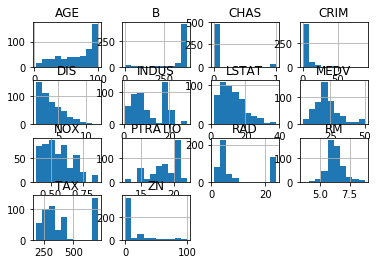

In [58]:
# Histograms for each attribute
dataset.hist()
pyplot.show()

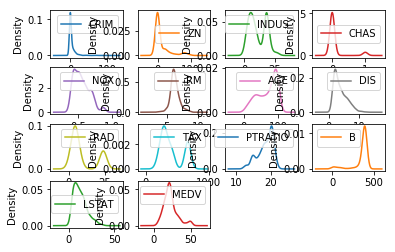

In [59]:
# Density plot for each attribute
dataset.plot(kind='density', subplots=True, layout=(4,4), sharex=False)
pyplot.show()

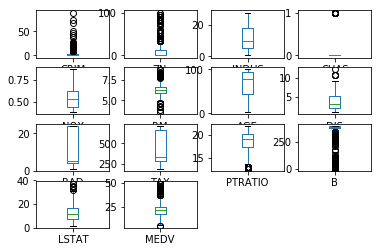

In [60]:
# Box and Whisker Plots
dataset.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)
pyplot.show()

#### 2.b.ii) Multivariate plots to better understand the relationships between attributes

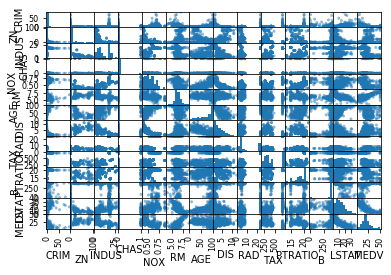

In [61]:
# Scatter plot matrix
scatter_matrix(dataset)
pyplot.show()

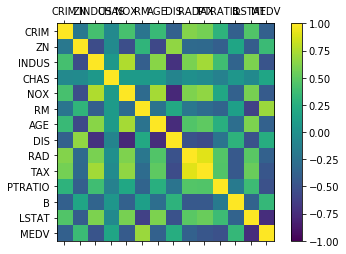

In [62]:
# Correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()

## Section 3 - Prepare Data
Some dataset may require additional preparation activities that will best exposes the structure of the problem and the relationships between the input attributes and the output variable. Some data-prep tasks might include:

Cleaning data by removing duplicates, marking missing values and even imputing missing values.
Feature selection where redundant features may be removed.
Data transforms where attributes are scaled or redistributed in order to best expose the structure of the problem later to learning algorithms.

In [63]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:13]
Y = array[:,13]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

### 3.a) Data Cleaning

### 3.b) Feature Selection

### 3.c) Data Transforms

## Section 4 - Evaluate Algorithms
After the data-prep, we next work on finding a workable model by evaluating a subset of machine learning algorithms that are good at exploiting the structure of the dataset. The typical evaluation tasks include:

Defining test options such as cross validation and the evaluation metric to use.
Spot checking a suite of linear and nonlinear machine learning algorithms.
Comparing the estimated accuracy of algorithms.
For this project, we will evaluate 6 different algorithms:

Linear Algorithms: Linear Regression (LR), Lasso Regression (LASSO), and ElasticNet (EN)

Nonliear Algorithms: Classification and Regression Trees (CART), Support Vector Regression (SVR), and k-Nearest Neighbors (KNN)

The random number seed is reset before each run to ensure that the evaluation of each algorithm is performed using the same data splits. It ensures the results are directly comparable.

### 4.a) Evaluate Algorithms: Baseline

In [64]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

In [65]:
# Set up algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [66]:
# Evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: -21.379856 (9.414264)
LASSO: -26.423561 (11.651110)
EN: -27.502259 (12.305022)
KNN: -41.896488 (13.901688)
CART: -28.326863 (11.252270)
SVR: -85.518342 (31.994798)


The linear regression model had the lowest Mean Square Error, followed by CART. However, there is one additional point worth considering.

In section 2, we observed the attributes all have quite different scales. Is it possible that standardizing the data might have positive effect on some algorithms, particularly those non-linear ones (KNN and SVR)?

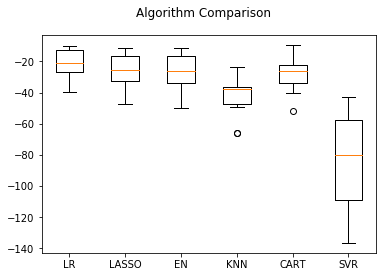

In [67]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

### 4.b) Evaluate Algorithms: Data Standardization

We had suspected that the differing scales of the training data might have an negative effect on the accuracy of the algorithms. In this section, we will evaluate the algorithms using a standardized dataset. Standardization means that the data get transformed such that each attribute has a mean value of zero and standard deviation of one.

In [68]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
	kfold = KFold(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

ScaledLR: -21.379856 (9.414264)
ScaledLASSO: -26.607314 (8.978761)
ScaledEN: -27.932372 (10.587490)
ScaledKNN: -20.107620 (12.376949)
ScaledCART: -25.376895 (12.846596)
ScaledSVR: -29.633086 (17.009186)


After the data standardization, we can see the KNN algorithm was actually doing the best.

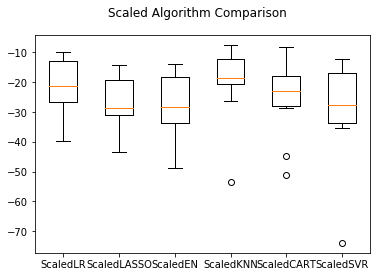

In [69]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## Section 5 - Improve Accuracy
After we achieve a short list of machine learning algorithms with good level of accuracy, we can leverage ways to improve the accuracy of the models:

* Search for a combination of parameters for each algorithm that yields the best results.
* Combine the prediction of multiple models into an ensemble prediction using standalone algorithms or the caretEnsemble package.

For this project, we look at how tuning the KNN algoritm could be helpful for our final model. For future project, we will also look at the ensemble methods for optimizing the model.

### 5.a) Algorithm Tuning
The KNN algorithm appeared to yield the lowest error when the number of neighbors equals to 3.

In [70]:
# KNN Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -18.172137 using {'n_neighbors': 3}
-20.208663 (15.029652) with: {'n_neighbors': 1}
-18.172137 (12.950570) with: {'n_neighbors': 3}
-20.131163 (12.203697) with: {'n_neighbors': 5}
-20.575845 (12.345886) with: {'n_neighbors': 7}
-20.368264 (11.621738) with: {'n_neighbors': 9}
-21.009204 (11.610012) with: {'n_neighbors': 11}
-21.151809 (11.943318) with: {'n_neighbors': 13}
-21.557400 (11.536339) with: {'n_neighbors': 15}
-22.789938 (11.566861) with: {'n_neighbors': 17}
-23.871873 (11.340389) with: {'n_neighbors': 19}
-24.361362 (11.914786) with: {'n_neighbors': 21}


### 5.b) Ensemble Methods
For this project, we will evaluate 4 different ensemble algorithms:

Boosting Methods: AdaBoost (AB) and Gradiant Boosting (GBM)

Bagging Methods: Random Forest (RF) and Extra Trees (ET) 

In [71]:
# Set up ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor())])))

In [72]:
# Evaluate each model in turn
results = []
names = []
for name, model in ensembles:
	kfold = KFold(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

ScaledAB: -14.742473 (6.378350)
ScaledGBM: -10.175324 (4.547332)
ScaledRF: -13.821962 (7.426998)
ScaledET: -10.373783 (6.297661)


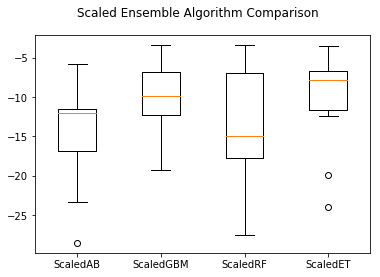

In [73]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

### 5.c) Ensemble Tuning
The GBM algorithm appeared to yield the lowest error when the number of estimators equals to 400.

In [74]:
# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -9.356471 using {'n_estimators': 400}
-10.812167 (4.724394) with: {'n_estimators': 50}
-10.040857 (4.441758) with: {'n_estimators': 100}
-9.694096 (4.275762) with: {'n_estimators': 150}
-9.539706 (4.270637) with: {'n_estimators': 200}
-9.448764 (4.262603) with: {'n_estimators': 250}
-9.429946 (4.273791) with: {'n_estimators': 300}
-9.369824 (4.254108) with: {'n_estimators': 350}
-9.356471 (4.267837) with: {'n_estimators': 400}


## Section 6 - Finalize Model
Once we have narrow down to a model that we believe can make accurate predictions on unseen data, we are ready to finalize it. Finalizing a model may involve sub-tasks such as:

Using an optimal model tuned to make predictions on unseen data.
Creating a standalone model using the tuned parameters
Saving an optimal model to file for later use.
### 6.a) Predictions on validation dataset

In [75]:
# Prepare the non-ensemble model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = KNeighborsRegressor(n_neighbors=3)
model.fit(rescaledX, Y_train)
# Transform the validation dataset and predict
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))

33.1874074074


In [76]:
# Prepare the ensemble model
model = GradientBoostingRegressor(random_state=seed, n_estimators=400)
model.fit(rescaledX, Y_train)
# Transform the validation dataset and predict
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))

11.8752520792
